신경망 학습에서 특히 중요한 것이 가중치의 초깃값이다. 가중치의 초깃값을 무엇으로 설정하느냐가 신경망 학습의 성패를 가르는 일이 실제로 자주 있다. 이번 절에서는 권장 초깃값에 대해서 설명하고 실험을 통해 실제로 신경망 학습이 신속하게 이뤄지는 모습을 확인하자.

# 6.2.1 초깃값을 0으로 하면?

이제부터 오버피팅을 억제해 범용 성능을 높이는 테크닉인 "__가중치 감소(weight decay)__"기법을 소개하려 한다. 가중치 감소는 간단히 말하자면 가중치 매개변수의 값이 작아지도록 학습하는 방법이다. 가중치 값을 작게 하여 오버피팅이 일어나지 않게 하는 것이다. 

가중치를 작게 만들고 싶으면 포깃값도 최대한 작은 값에서 시작하는 것이 정공법이다. 사실 지금까지 가중치의 초깃값은 0.01*np.random.rand(10,100)처럼 정규분포에서 생성되는 값을 0.01배 한 작은 값을 사용하였다.

그렇다면 가중치의 초깃값을 모두 0으로 설정하면 어떻까? 답부터 얘기하면, 이는 나쁜 아이디어이다. 실제로 가중치 초깃값을 0으로 하면 학습이 올바르게 이뤄지지 않는다.

초깃값을 모두 0으로 해서는 안되는 이유는 무엇일까?(정확히는 가중치를 균일한 값으로 설정해서는 안된다.) 그 이유는 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문이다. 예를 들어 신경망에서 첫 번째와 두 번째 층의 가중치가 0이라고 가정하자. 그럼 순전파 때는 입력층의 가중치가 0이기 때문에 두 번째 층의 뉴런에 모두 같은 값이 전달된다. 두 번째 층의 모든 뉴런에 같은 값이 입력된다는 것은 역전파 때 두 번째 층의 가중치가 모두 똑같이 갱신된다는 말이 된다. 그래서 가중치들은 같은 초깃값에서 시작하면 갱신ㅇ르 거쳐도 여전히 같은 값을 유지하게 되는 것이다. 이는 가중치를 여러개 갖는 의미를 사라지게 한다. 이 "가중치가 고르게 되어버리는 상황"을 막으려면 초깃값을 무작위로 설정해야 한다.

# 6.2.2 은닉층의 활성화값 분포

은닉층의 활성화 값(활성화 함수의 출력 데이터)의 분포를 관찰하면 중요한 정보를 얻을 수 있다. 이번 절에서는 가중치의 초깃값에 따라 은닉층 활성화 값들이 어떻게 변화하는지 간단한 실험을 해보려 한다. 구체적으로는 활성화 함수로 시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 입력 데이터를 흘리며 각 층의 활성화 값 분포를 히스토그램으로 그려보자.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1
    a = x @ w
    z = sigmoid(a)
    
    activations[i] = z

층이 5개가 있으며, 각 층의 뉴런은 100개씩이다. 입력 데이터로서 1,000개의 데이터를 정규분포로 무작위로 생성하여 이 5층 신경망에 흘린다. 활성화 함수로는 시그모이드 함수를 이용했고, 각 층의 활성화 결과를 activations 변수에 저장한다. 이 코드에서는 가중치의 분포에 주의해야 한다. 이번에는 표준편차가 1인 정규분포를 이용했는데, 이 분포된 정도를 바꿔가며 활성화 값들의 분포가 어떻게 변화하는지 관찰하는 것이 이 실험의 목적이다. 그럼 activations에 저장된 각 층의 활성화 값 데이터를 히스토그램으로 그려보자.

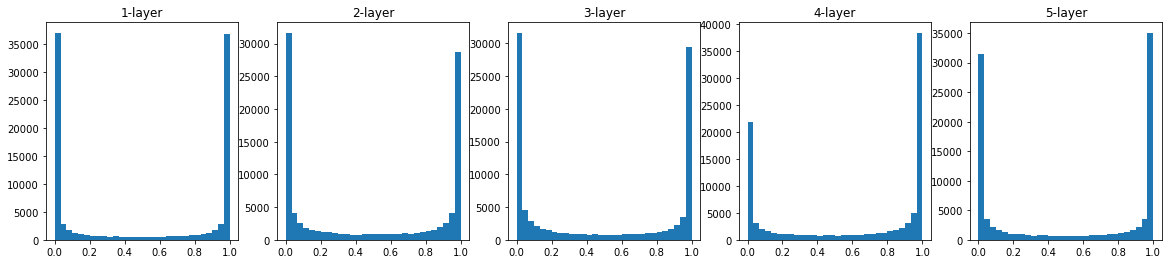

In [11]:
plt.figure(figsize=(20,4))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f"{i+1}-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

각 층의 활성화 값들이 0과 1에 치우쳐 분포되어 있다. 여기에서 사용한 시그모이드 함수는 그 출력이 0에 다가가자 그 미분은 0에 다가간다. 그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라진다. 이것이 "__기울기 소실(gradient vanishing)__"이라 알려진 문제이다. 층을 깊게 하는 딥러닝에서는 기울기 소실은 더 심각한 문제가 될 수 있다.

이번에는 가중치의 표준편차를 0.01로 바꿔 같은 실험을 반복해보자.

In [22]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01
    a = x @ w
    z = sigmoid(a)
    
    activations[i] = z

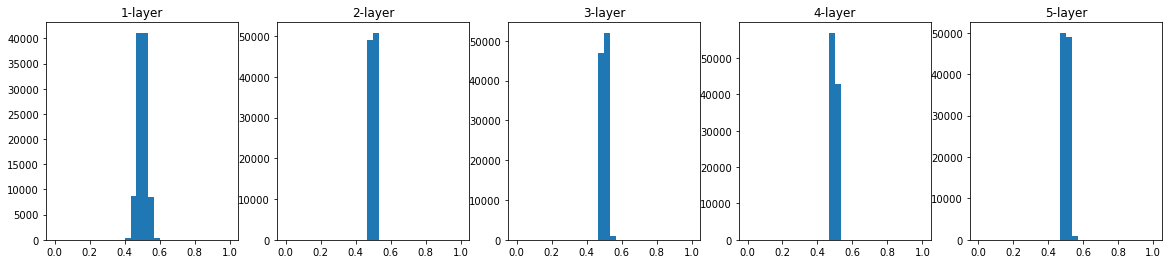

In [23]:
plt.figure(figsize=(20,4))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f"{i+1}-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

이번에는 0.5 부근에 집중되었다. 앞의 예처럼 0과 1로 치우치진 않았으니 기울기 소실 문제는 일어나지 않지만, 활성화 값들이 치우쳤다는 것은 표현력 관점에서는 큰 문제가 있는 것이다. 무슨 말이냐면, 이 상황에서는 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러개 둔 의미가 없어진다는 뜻이다. 예를 들어 뉴런 100개가 거의 같은 값을 출력한다면 뉴런 1개짜리와 별반 다를 게 없다는 것이다. 그래서 활성화 값들이 치우치면 "__표현력을 제한__"한다는 관점에서 문제가 된다.

이어서 Xavier Glorot와 Yoshua Bengio의 논문에서 권장하는 가중치 초깃값인, 일명 "__Xavier 초깃값__"을 써보자. 현재 Xavier 초깃값은 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있다. 예를 들어 카페 프레임워크는 가중치 초깃값을 설정할 때 인수로 xavier를 지정할 수 있다.

이 논문은 각 층의 활성화 값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾고자 했다. 그리고 앞 계층의 노드가 n개라면 포준편차가 $\frac{1}{\sqrt{n}}$인 분포를 사용하면 된다는 결론을 이끌었다. 
(사비에르의 논문에는 앞 층의 입력 노드 수 외에 다음 층의 출력 노드 수도 고려한 설정값을 제안한다. 다만 카페 등의 프레임워크는 앞 층의 입력 노드만으로 계산하도록 단순화하였다.)

<img src=images/6_12.png height=100px widht=500px>

Xavier 초깃값을 사용하면 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다. 이제 Xavier 초깃값을 써서 실험해보자. 코드에서는 가중치 초깃값 설정 부분을 다음과 같이 고쳐주기만 하면된다.(모든 층의 노드 수를 100개라고 단순화했다.)

In [54]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * (1/np.sqrt(node_num))
    a = x @ w
    z = sigmoid(a)
    
    activations[i] = z

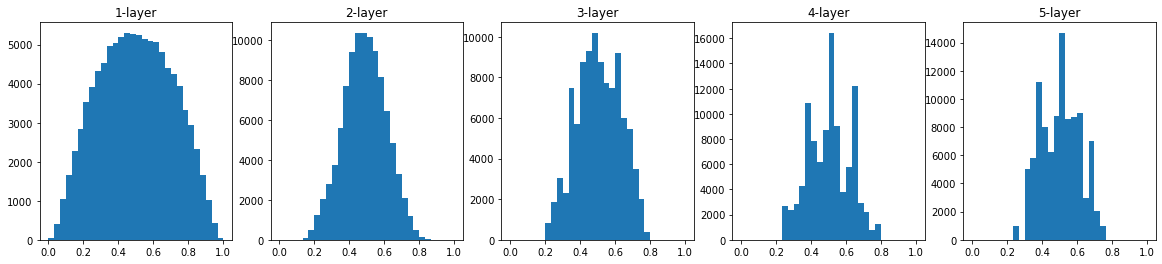

In [55]:
plt.figure(figsize=(20,4))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f"{i+1}-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

Xavier 초깃값을 사용한 결과는 위와 같다. 이 결과를 보면 층이 깊어지면서 형태가 다소 일그러지지만, 앞에서 본 방식보다는 확실히 넓게 분포됨을 알 수 있다. 각 층에 흐르는 데이터는 적당히 퍼져 있으므로, 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄질 것으로 기대된다.

# 6.2.3 ReLU 함수를 사용할 때의 가중치 초깃값

Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과이다. sigmoid 함수와 tanh 함수는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있다. 그래서 Xavier 초깃값이 적당하다. 반면 ReLU 함수를 이용할 때는 ReLU 함수에 특화된 초깃값을 이용하라고 권장한다. 이 특화된 초깃값을 찾아낸 카이밍 히(kaiming He)의 이름을 따 "__He 초깃값__"이라 한다. He 초깃값은 앞 계층의 노드가 n개일 때, 표준편차가 $\sqrt{\frac{2}{n}}$인 정규분포를 사용한다. Xavier 초깃값이 $\sqrt{\frac{1}{n}}$이었다. ReLU 함수는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요하다고 해석할 수 있다.

그러면 활성화 함수로 ReLU 함수를 이용한 경우의 활성화 값 분포를 보자. 다음은 표준편차가 0.01인 정규분포, Xavier 초깃값, ReLU 함수 전용 He 초깃값일 때의 실험 결과를 차례로 보여준다.

In [50]:
x_std = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations_std = {}

for i in range(hidden_layer_size):
    if i != 0:
        x_std = activations_std[i-1]
        
    w_std = np.random.randn(node_num, node_num) * 0.01
    a_std = x_std @ w_std
    z_std = ReLU(a_std)
    
    activations_std[i] = z_std
    
x_xa = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations_xa = {}

for i in range(hidden_layer_size):
    if i != 0:
        x_xa = activations_xa[i-1]
        
    w_xa = np.random.randn(node_num, node_num) * (1/np.sqrt(node_num))
    a_xa = x_xa @ w_xa
    z_xa = ReLU(a_xa)
    
    activations_xa[i] = z_xa
    
x_he = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations_he = {}

for i in range(hidden_layer_size):
    if i != 0:
        x_he = activations_he[i-1]
        
    w_he = np.random.randn(node_num, node_num) * (np.sqrt(2/node_num))
    a_he = x_he @ w_he
    z_he = ReLU(a_he)
    
    activations_he[i] = z_he

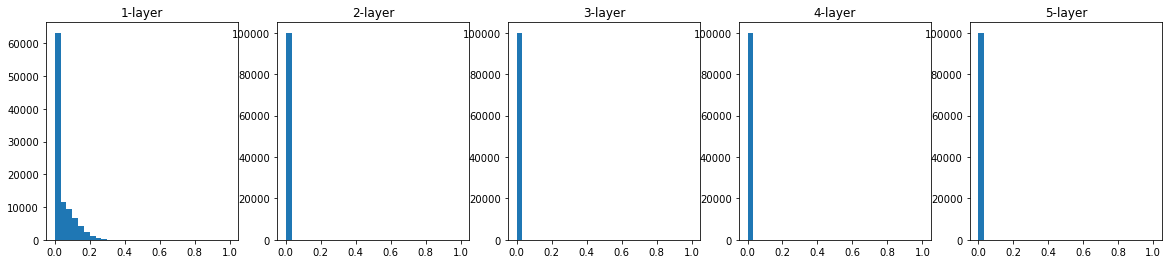

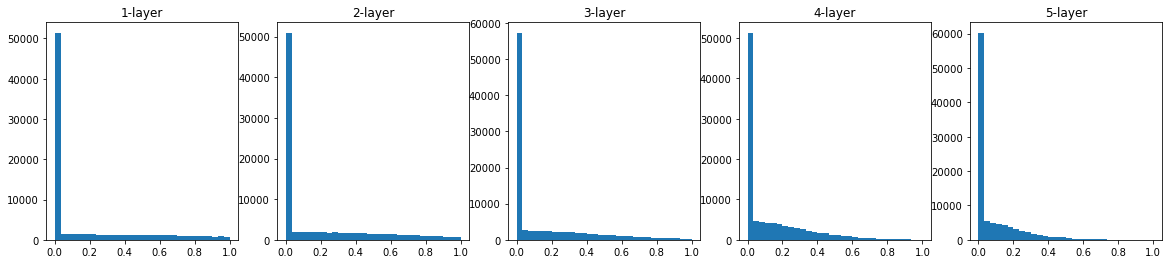

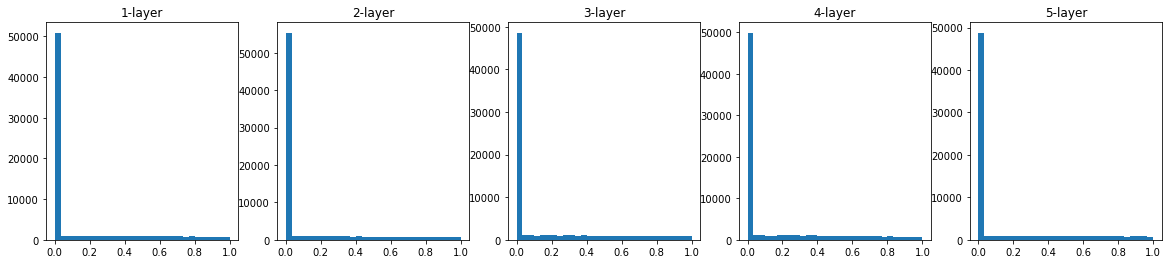

In [67]:
plt.figure(figsize=(20,4))

for i, a in activations_std.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f"{i+1}-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

plt.figure(figsize=(20,4))

for i, a in activations_xa.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f"{i+1}-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

plt.figure(figsize=(20,4))

for i, a in activations_he.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f"{i+1}-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

결과를 보면 std = 0.01 일때의 각 층의 활성화 값들은 아주 작은 값들이다. 신경망에 아주 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기 역시 작아진다는 뜻이다. 이는 중대한 문제이며, 실제로도 학습이 거의 이루어 지지 않을 것이다.

이어서 Xavier 초깃값 결과를 보면 이쪽은 층이 깊어지면서 치우침이 조금씩 커진다. 실제로 층이 깊어지면 활성화 값들의 치우침도 커지고, 학습할 때 "기울기 소실"문제를 일이킨다.

마지막으로 He 초깃값은 모든 층에서 균일하게 분포되었다. 층이 깊어져도 분포가 균일하게 유지되기에 역전파 때도 적절한 값이 나올 것으로 기대할 수 있다.

이상의 실험의 결과를 바탕으로, 활성화 함수로 ReLU 함수를 사용할 때에는 He 초깃값을, simgmoid 함수와 tanh 함수에는 Xavier 초깃값을 사용하면 된다. 이것이 현재의 모범 사례라고 할 수 있다.

# 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

이번에는 "실제" 데이터를 가지고 가중치의 초깃값을 방법이 신경망 학습에 얼마나 영향을 주는지 보자. 지금가지 살펴본 세 경우 모두를 실험해보자. 결과부터 보면 다음과 같다. 

In [1]:
def filter(n,y):
    filtered = np.zeros(len(y)-1)

    for k in range(1, len(y)):
        value_data = 0
        if k <= n:
            for t in range(1, k+1):
                value_data += y[t]
            filtered[k-1] += (value_data/k)
        else:
            for t in range(k-n+1, k+1):
                value_data += y[t]
            filtered[k-1] += (value_data/n)

    return filtered

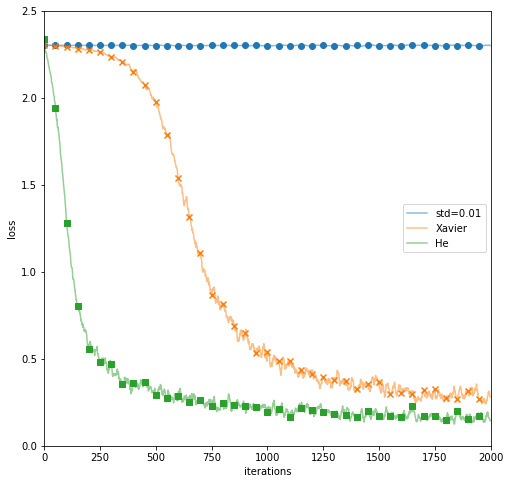

In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from multilayernet import MultiLayerNet
from optimizer import SGD
from source.dataset.mnist import load_mnist
import matplotlib.pyplot as plt

## 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network1 = MultiLayerNet(input_size=784, hidden_size=[100,100,100,100,100,100], output_size=10, weight_init=0.01)
network2 = MultiLayerNet(input_size=784, hidden_size=[100,100,100,100,100,100], output_size=10, weight_init="Xavier")
network3 = MultiLayerNet(input_size=784, hidden_size=[100,100,100,100,100,100], output_size=10, weight_init="ReLU")
optimizer = SGD(lr=0.01)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100

std_loss_list = []
xavier_loss_list = []
he_loss_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network1.gradient(x_batch, t_batch)
    optimizer.update(network1.params, grads)
    
    loss = network1.loss(x_batch, t_batch)
    std_loss_list.append(loss)
    
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network2.gradient(x_batch, t_batch)
    optimizer.update(network2.params, grads)
    
    loss = network2.loss(x_batch, t_batch)
    xavier_loss_list.append(loss)
    
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network3.gradient(x_batch, t_batch)
    optimizer.update(network3.params, grads)
    
    loss = network3.loss(x_batch, t_batch)
    he_loss_list.append(loss)
            
iters = np.arange(iters_num-1)
std_loss_list = filter(11, std_loss_list)
xavier_loss_list = filter(11, xavier_loss_list)
he_loss_list = filter(11, he_loss_list)

plt.figure(figsize=(8,8))
plt.plot(iters, std_loss_list, label="std=0.01", alpha=0.5)
plt.plot(iters, xavier_loss_list, label="Xavier", alpha=0.5)
plt.plot(iters, he_loss_list, label="He", alpha=0.5)
plt.scatter(iters[::50], std_loss_list[::50], marker="o")
plt.scatter(iters[::50], xavier_loss_list[::50], marker="x")
plt.scatter(iters[::50], he_loss_list[::50], marker="s")
plt.xlabel("iterations")
plt.ylabel("loss")
plt.xlim(0,2000)
plt.ylim(0.0,2.5)
plt.legend()
plt.show()

<img src=images/6_15.png height=100px width=500px>

이 실험은 층별 뉴런수가 100개인 5층 신경망에서 활성화 함수로 ReLU 함수를 사용했다. 여기서 보듯 std = 0.01일 때는 학습이 전혀 이뤄지지 않았다. 앞서 활성화 값의 분포에서 본 것처럼 순전파 때 너무 작은 값이 흐르기 때문이다. 그로 인해 역전파 대의 기울기도 작아져 가중치가 거의 갱신되지 않는 것이다. 반대로 Xavier와 He 초깃값의 경우에는 학습이 순조롭게 이뤄지고 있다. 다만 학습 진도는 He 초깃값이 쪽이 더 빠르다. 지금까지 살펴보았듯 가중치의 초깃값은 신경망 학습에 아주 중요한 포인트이다. 가중치의 초깃값에 따라 신경망 학습의 성패가 갈리는 경우가 많다. 초깃값의 중요성은 간과하기 쉬운 부분이다만, 어떤 일이든 시작이 중요한 법이다. 가중치 초깃값이 중요함을 다시 한번 강조하면서 이번 절을 마친다.